<a href="https://colab.research.google.com/github/AlexanderF048/GOIT_DS/blob/main/HW_6_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **DF2 Example**

In [55]:
df_2d = pd.read_csv('gdrive/My Drive/Data-science/data_hw_6/data_2d.csv')
df_2d.head(5)
df_2d.columns

Index(['0.000000000000000000e+00', '-7.687164597386728637e-01',
       '4.608603078297135447e-01'],
      dtype='object')

In [25]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_2d)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
distortions

[858.964541763682,
 362.7751486474807,
 280.22929462142594,
 217.0831872531781,
 178.22173541041803,
 147.12741192534912,
 129.23945958079543,
 115.59585782184868,
 106.30126725998099]

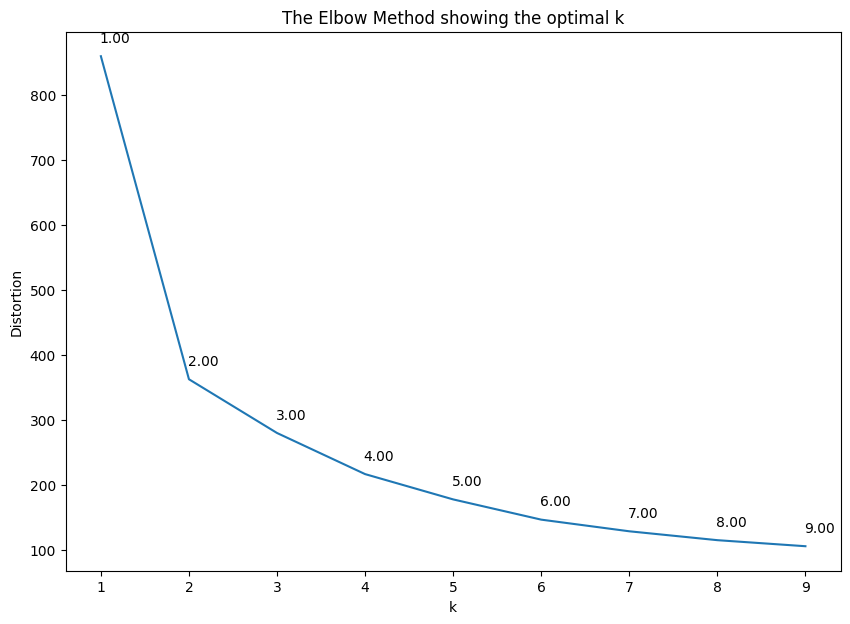

In [42]:
plt.figure(figsize=(10,7))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
for x,y in zip(K,distortions):

    label = "{:.2f}".format(x)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [44]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df_2d)

print(kmeans.labels_)

print(kmeans.cluster_centers_)

[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.88679245 2.46153947 3.47045812]
 [0.06451613 0.98518995 0.79538614]]


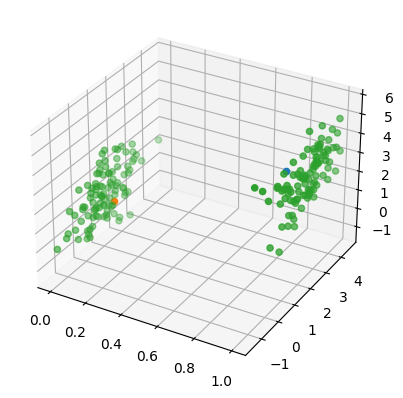

In [56]:
fig = plt.figure()
visualization = fig.add_subplot(projection="3d")

for cluster in kmeans.cluster_centers_:
  visualization.scatter(cluster[0], cluster[1], cluster[2]) #centers of clusters

visualization.scatter(df_2d.iloc[:,0], df_2d.iloc[:,1], df_2d.iloc[:,2]) #data objects



### **DF2 Example**

In [58]:
df_mnist = pd.read_csv('gdrive/My Drive/Data-science/data_hw_6/mnist.csv')
df_mnist.head(5)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from sklearn import set_config
set_config(transform_output="pandas")

In [75]:
pca = PCA(n_components=3)
pca.fit(df_mnist)
df_pca = pca.fit_transform(df_mnist)
df_pca

,pca0,pca1,pca2
0,-75.854675,-1043.504565,-47.388220
1,-969.408904,-344.770813,-273.245839
2,1054.122176,-358.685102,-194.331382
3,420.942072,671.090860,-563.903670
4,-1002.830361,-302.502541,-92.114822
...,...,...,...
494,1104.167347,-247.816259,48.462366
495,91.010671,817.056258,69.936765
496,-500.898922,283.052198,258.308705
497,426.620821,-45.497736,-79.702910


In [76]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

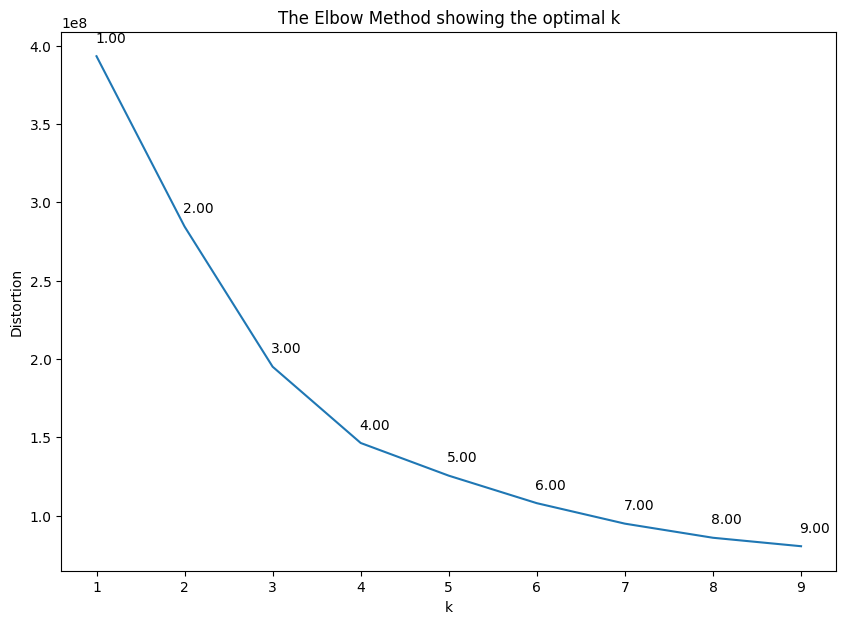

In [77]:
plt.figure(figsize=(10,7))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
for x,y in zip(K,distortions):

    label = "{:.2f}".format(x)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [78]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df_pca)

print(kmeans.labels_)

print(kmeans.cluster_centers_)

[0 1 2 3 1 3 3 2 3 2 2 3 2 1 0 3 3 0 3 3 0 2 0 3 2 3 3 0 1 0 1 0 2 3 2 3 1
 1 1 1 3 3 1 1 0 1 1 3 3 1 0 0 0 2 0 3 1 3 1 3 2 3 1 3 3 2 3 0 2 3 2 2 1 1
 3 0 3 1 3 3 2 2 3 3 3 3 0 2 1 0 3 1 0 1 3 1 1 2 3 2 2 0 3 3 3 2 1 3 3 0 1
 1 3 1 3 3 3 3 2 0 3 3 2 3 3 2 3 0 0 2 2 0 3 0 1 2 1 2 3 1 3 3 1 3 1 3 2 2
 1 3 3 1 0 1 0 2 2 0 1 3 2 0 3 3 0 3 1 1 3 3 3 0 0 2 1 1 0 1 0 1 0 1 2 0 3
 0 0 0 1 1 1 2 3 0 1 1 1 3 2 0 2 1 1 1 1 3 0 2 3 3 1 3 1 3 2 0 1 1 0 3 2 2
 3 1 2 0 3 1 1 1 1 0 3 1 3 1 1 3 1 0 0 2 3 1 1 2 1 3 1 3 1 3 0 3 3 1 1 2 2
 3 1 3 1 1 1 0 1 0 2 0 2 1 3 3 3 1 0 2 1 2 3 1 1 3 2 1 2 1 0 3 2 3 3 0 3 2
 2 2 0 1 3 1 1 3 2 1 3 3 1 0 2 2 0 1 3 1 1 2 0 1 1 3 1 2 1 1 2 1 1 1 1 1 0
 0 0 3 3 0 2 1 3 1 0 0 1 0 0 1 3 1 0 0 2 1 1 0 1 3 3 2 2 3 1 0 0 2 0 0 0 3
 1 2 0 3 0 3 1 1 3 2 3 0 1 2 1 0 1 1 3 2 0 3 1 3 0 2 0 3 3 2 0 0 3 2 3 0 0
 0 1 3 1 0 3 3 3 1 3 2 1 1 2 3 2 2 3 1 1 3 3 1 0 3 3 3 1 0 0 3 1 2 2 0 1 2
 2 2 3 0 0 0 0 1 0 3 1 1 0 3 2 3 2 2 2 1 0 0 1 3 0 0 3 2 1 0 2 1 2 0 0 1 3
 3 1 3 2 3 3 3 1 2 0 2 0 

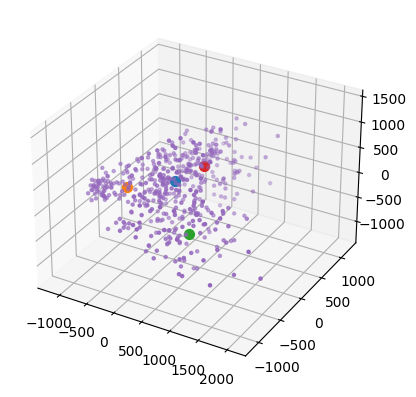

In [84]:
fig = plt.figure()
visualization = fig.add_subplot(projection="3d")

for cluster in kmeans.cluster_centers_:
  visualization.scatter(cluster[0], cluster[1], cluster[2], s=50) #centers of clusters

visualization.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], df_pca.iloc[:,2], s=5) #data objects

